<a href="https://colab.research.google.com/github/rahul0772/python-ml-ai-relearning/blob/main/AI%20and%20ML%20with%20PyTorch/day15_Pytorch_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ## Fully Connected Neural Network (FCNN) for MNIST Classification

# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# ## 1. Load the MNIST Dataset

# Define a transformation to normalize the images to a range of [0, 1]
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the MNIST training and test datasets
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create DataLoader to load data in batches during training and testing
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# ## 2. Define the Fully Connected Neural Network (FCNN) Model

# FCNN model: this network will use only fully connected layers (no convolution)
class FCNN(nn.Module):
    def __init__(self):
        super(FCNN, self).__init__()

        # Flatten input (28x28 images -> 784 features)
        self.fc1 = nn.Linear(28 * 28, 128)  # First fully connected layer
        self.fc2 = nn.Linear(128, 64)       # Second fully connected layer
        self.fc3 = nn.Linear(64, 10)        # Output layer (10 classes, one for each digit 0-9)

    def forward(self, x):
        # Flatten the input image from 28x28 to 784 features
        x = x.view(-1, 28 * 28)

        # First fully connected layer with ReLU activation
        x = torch.relu(self.fc1(x))

        # Second fully connected layer with ReLU activation
        x = torch.relu(self.fc2(x))

        # Output layer (no activation function since we will use CrossEntropyLoss)
        x = self.fc3(x)
        return x

# Instantiate the FCNN model
model = FCNN()

# ## 3. Set Up the Optimizer and Loss Function

# We will use the Adam optimizer for weight updates and CrossEntropyLoss for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# ## 4. Training the Model

# Define the number of epochs (iterations over the entire dataset)
epochs = 5

# Training loop
for epoch in range(epochs):
    running_loss = 0.0  # To keep track of the loss
    correct = 0  # To count correct predictions
    total = 0    # To count total predictions
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()  # Zero the gradients before the backward pass

        # Forward pass: get predictions from the model
        outputs = model(inputs)

        # Calculate the loss using CrossEntropyLoss
        loss = criterion(outputs, labels)

        # Backpropagation: calculate gradients for each parameter
        loss.backward()

        # Update model parameters based on gradients
        optimizer.step()

        # Update running loss
        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)  # Get predicted class index
        total += labels.size(0)  # Add batch size
        correct += (predicted == labels).sum().item()  # Add correct predictions

    # Print the statistics for this epoch
    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(trainloader):.4f}, Accuracy: {100 * correct / total:.2f}%")

# ## 5. Evaluate on the Test Set

# Set the model to evaluation mode (no need to calculate gradients)
model.eval()

correct = 0
total = 0
with torch.no_grad():  # No gradients are calculated here, faster inference
    for data in testloader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Print the accuracy on the test set
print(f"\nTest Accuracy: {100 * correct / total:.2f}%")

# ## 6. Visualize Some Test Images with Predictions

# Get a batch of test images
dataiter = iter(testloader)
images, labels = dataiter.next()

# Get the model's predictions for the batch
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Plot some images along with their true labels and predicted labels
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    ax = axes[i]
    ax.imshow(images[i].squeeze(), cmap="gray")
    ax.set_title(f"True: {labels[i].item()}, Pred: {predicted[i].item()}")
    ax.axis('off')
plt.show()

100%|██████████| 9.91M/9.91M [00:00<00:00, 13.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 351kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.13MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.06MB/s]


Epoch [1/5], Loss: 0.4023, Accuracy: 88.06%
Epoch [2/5], Loss: 0.1936, Accuracy: 94.25%
Epoch [3/5], Loss: 0.1396, Accuracy: 95.71%
Epoch [4/5], Loss: 0.1130, Accuracy: 96.46%
Epoch [5/5], Loss: 0.0961, Accuracy: 97.03%

Test Accuracy: 95.98%


AttributeError: '_SingleProcessDataLoaderIter' object has no attribute 'next'

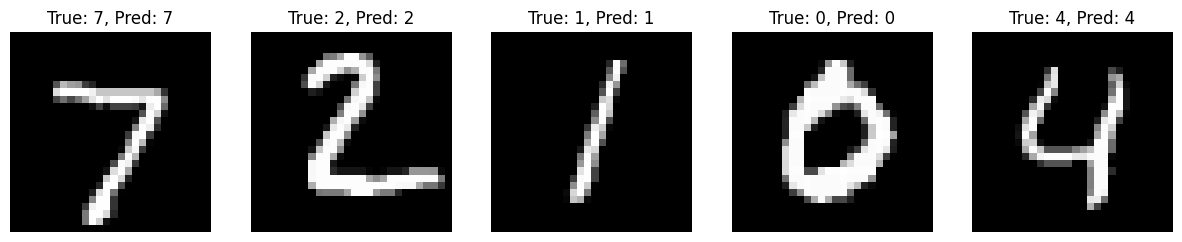

In [2]:
# Get a batch of test images
dataiter = iter(testloader)
images, labels = next(dataiter)  # Use next() instead of dataiter.next()

# Get the model's predictions for the batch
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Plot some images along with their true labels and predicted labels
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    ax = axes[i]
    ax.imshow(images[i].squeeze(), cmap="gray")
    ax.set_title(f"True: {labels[i].item()}, Pred: {predicted[i].item()}")
    ax.axis('off')
plt.show()